In [ ]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split # model split

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))


In [ ]:
df = pd.read_csv('http://kdd.ics.uci.edu/databases/kddcup99/kddcup.data_10_percent.gz')

In [ ]:
df.columns = [
    'duration',
    'protocol_type',
    'service',
    'flag',
    'src_bytes',
    'dst_bytes',
    'land',
    'wrong_fragment',
    'urgent',
    'hot',
    'num_failed_logins',
    'logged_in',
    'num_compromised',
    'root_shell',
    'su_attempted',
    'num_root',
    'num_file_creations',
    'num_shells',
    'num_access_files',
    'num_outbound_cmds',
    'is_host_login',
    'is_guest_login',
    'count',
    'srv_count',
    'serror_rate',
    'srv_serror_rate',
    'rerror_rate',
    'srv_rerror_rate',
    'same_srv_rate',
    'diff_srv_rate',
    'srv_diff_host_rate',
    'dst_host_count',
    'dst_host_srv_count',
    'dst_host_same_srv_rate',
    'dst_host_diff_srv_rate',
    'dst_host_same_src_port_rate',
    'dst_host_srv_diff_host_rate',
    'dst_host_serror_rate',
    'dst_host_srv_serror_rate',
    'dst_host_rerror_rate',
    'dst_host_srv_rerror_rate',
    'outcome'
]

# display 5 rows
df[0:19289]

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,outcome
0,0,tcp,http,SF,239,486,0,0,0,0,...,19,1.00,0.00,0.05,0.00,0.0,0.0,0.0,0.0,normal.
1,0,tcp,http,SF,235,1337,0,0,0,0,...,29,1.00,0.00,0.03,0.00,0.0,0.0,0.0,0.0,normal.
2,0,tcp,http,SF,219,1337,0,0,0,0,...,39,1.00,0.00,0.03,0.00,0.0,0.0,0.0,0.0,normal.
3,0,tcp,http,SF,217,2032,0,0,0,0,...,49,1.00,0.00,0.02,0.00,0.0,0.0,0.0,0.0,normal.
4,0,tcp,http,SF,217,2032,0,0,0,0,...,59,1.00,0.00,0.02,0.00,0.0,0.0,0.0,0.0,normal.
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19284,0,tcp,smtp,SF,1204,499,0,0,0,0,...,242,0.94,0.04,0.01,0.01,0.0,0.0,0.0,0.0,normal.
19285,0,udp,private,SF,28,0,0,1,0,0,...,1,0.01,0.05,0.01,0.00,0.0,0.0,0.0,0.0,teardrop.
19286,0,udp,private,SF,28,0,0,3,0,0,...,2,0.03,0.05,0.03,0.00,0.0,0.0,0.0,0.0,teardrop.
19287,0,udp,private,SF,28,0,0,3,0,0,...,3,0.04,0.05,0.04,0.00,0.0,0.0,0.0,0.0,teardrop.


In [ ]:
df.head()

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,outcome
0,0,tcp,http,SF,239,486,0,0,0,0,...,19,1.0,0.0,0.05,0.0,0.0,0.0,0.0,0.0,normal.
1,0,tcp,http,SF,235,1337,0,0,0,0,...,29,1.0,0.0,0.03,0.0,0.0,0.0,0.0,0.0,normal.
2,0,tcp,http,SF,219,1337,0,0,0,0,...,39,1.0,0.0,0.03,0.0,0.0,0.0,0.0,0.0,normal.
3,0,tcp,http,SF,217,2032,0,0,0,0,...,49,1.0,0.0,0.02,0.0,0.0,0.0,0.0,0.0,normal.
4,0,tcp,http,SF,217,2032,0,0,0,0,...,59,1.0,0.0,0.02,0.0,0.0,0.0,0.0,0.0,normal.


In [ ]:
df.describe()

,duration,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,num_failed_logins,logged_in,num_compromised,...,dst_host_count,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate
count,494020.000000,4.940200e+05,4.940200e+05,494020.000000,494020.000000,494020.000000,494020.000000,494020.000000,494020.000000,494020.000000,...,494020.000000,494020.000000,494020.000000,494020.000000,494020.000000,494020.000000,494020.000000,494020.000000,494020.000000,494020.000000
mean,47.979400,3.025616e+03,8.685232e+02,0.000045,0.006433,0.000014,0.034519,0.000152,0.148245,0.010212,...,232.471230,188.666034,0.753779,0.030906,0.601936,0.006684,0.176754,0.176443,0.058118,0.057412
std,707.747185,9.882191e+05,3.304003e+04,0.006673,0.134805,0.005510,0.782103,0.015520,0.355343,1.798328,...,64.744665,106.040236,0.410781,0.109259,0.481309,0.042133,0.380593,0.380920,0.230590,0.230141
min,0.000000,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,4.500000e+01,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,255.000000,46.000000,0.410000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,5.200000e+02,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,255.000000,255.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.000000,1.032000e+03,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,255.000000,255.000000,1.000000,0.040000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,58329.000000,6.933756e+08,5.155468e+06,1.000000,3.000000,3.000000,30.000000,5.000000,1.000000,884.000000,...,255.000000,255.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 494020 entries, 0 to 494019
Data columns (total 42 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   duration                     494020 non-null  int64  
 1   protocol_type                494020 non-null  object 
 2   service                      494020 non-null  object 
 3   flag                         494020 non-null  object 
 4   src_bytes                    494020 non-null  int64  
 5   dst_bytes                    494020 non-null  int64  
 6   land                         494020 non-null  int64  
 7   wrong_fragment               494020 non-null  int64  
 8   urgent                       494020 non-null  int64  
 9   hot                          494020 non-null  int64  
 10  num_failed_logins            494020 non-null  int64  
 11  logged_in                    494020 non-null  int64  
 12  num_compromised              494020 non-null  int64  
 13 

In [ ]:
df.describe()

,duration,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,num_failed_logins,logged_in,num_compromised,...,dst_host_count,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate
count,494020.000000,4.940200e+05,4.940200e+05,494020.000000,494020.000000,494020.000000,494020.000000,494020.000000,494020.000000,494020.000000,...,494020.000000,494020.000000,494020.000000,494020.000000,494020.000000,494020.000000,494020.000000,494020.000000,494020.000000,494020.000000
mean,47.979400,3.025616e+03,8.685232e+02,0.000045,0.006433,0.000014,0.034519,0.000152,0.148245,0.010212,...,232.471230,188.666034,0.753779,0.030906,0.601936,0.006684,0.176754,0.176443,0.058118,0.057412
std,707.747185,9.882191e+05,3.304003e+04,0.006673,0.134805,0.005510,0.782103,0.015520,0.355343,1.798328,...,64.744665,106.040236,0.410781,0.109259,0.481309,0.042133,0.380593,0.380920,0.230590,0.230141
min,0.000000,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,4.500000e+01,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,255.000000,46.000000,0.410000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,5.200000e+02,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,255.000000,255.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.000000,1.032000e+03,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,255.000000,255.000000,1.000000,0.040000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,58329.000000,6.933756e+08,5.155468e+06,1.000000,3.000000,3.000000,30.000000,5.000000,1.000000,884.000000,...,255.000000,255.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [ ]:
df.drop(['num_outbound_cmds'], axis=1, inplace=True)  #preprocessing

In [ ]:
(df['outcome'].value_counts())

smurf.              280790
neptune.            107201
normal.              97277
back.                 2203
satan.                1589
ipsweep.              1247
portsweep.            1040
warezclient.          1020
teardrop.              979
pod.                   264
nmap.                  231
guess_passwd.           53
buffer_overflow.        30
land.                   21
warezmaster.            20
imap.                   12
rootkit.                10
loadmodule.              9
ftp_write.               8
multihop.                7
phf.                     4
perl.                    3
spy.                     2
Name: outcome, dtype: int64

In [ ]:
for f in range(0,10):
    df = df.iloc[np.random.permutation(len(df))]

In [ ]:
x = df.drop('outcome', axis = 1)
y = df['outcome']

In [ ]:
x.shape

(494020, 40)

In [ ]:
y.shape

(494020,)

In [ ]:
from sklearn.compose import ColumnTransformer
from sklearn.ensemble import IsolationForest
from sklearn.neighbors import LocalOutlierFactor
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import (
    OneHotEncoder,
    OrdinalEncoder,
    RobustScaler,
    StandardScaler,
)
categorical_columns = ["protocol_type", "service", "flag"]

ordinal_encoder = OrdinalEncoder(
    handle_unknown="use_encoded_value", unknown_value=-1
)
preprocessor = ColumnTransformer(
    transformers=[
        ("categorical", ordinal_encoder, categorical_columns),
    ],
    remainder="passthrough",
)
x = preprocessor.fit_transform(x)
y = np.where(y == 'normal.',1,0)

In [ ]:
x.shape

(494020, 40)

In [ ]:
y.shape

(494020,)

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(x ,y , test_size = 0.2, random_state = 42)

In [ ]:
y_train

array([0, 0, 0, ..., 0, 0, 0])

In [ ]:
iforest = IsolationForest(n_estimators=100, bootstrap=True, random_state=42)
iforest.fit(x_train,y_train)
y_pred1 = iforest.predict(x_test)
y_pred1 = np.where(y_pred1 == 1, 1, 0) # normal = 1, anomaly = 0
y_pred2 = iforest.decision_function(x_test) # negative : outliers, positive : inliers

In [ ]:
y_pred1[20:30]

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1])

In [ ]:
y_pred2

array([0.0679621 , 0.14515749, 0.17211448, ..., 0.17211448, 0.1002014 ,
       0.17211448])

In [ ]:
y_test

array([1, 0, 0, ..., 0, 0, 0])

In [ ]:
from sklearn.metrics import classification_report
print("Printing the classification report with fixed parameters...")
print(classification_report(y_test, y_pred1))

Printing the classification report with fixed parameters...
              precision    recall  f1-score   support

           0       0.62      0.10      0.18     79574
           1       0.17      0.73      0.27     19230

    accuracy                           0.23     98804
   macro avg       0.39      0.42      0.22     98804
weighted avg       0.53      0.23      0.19     98804



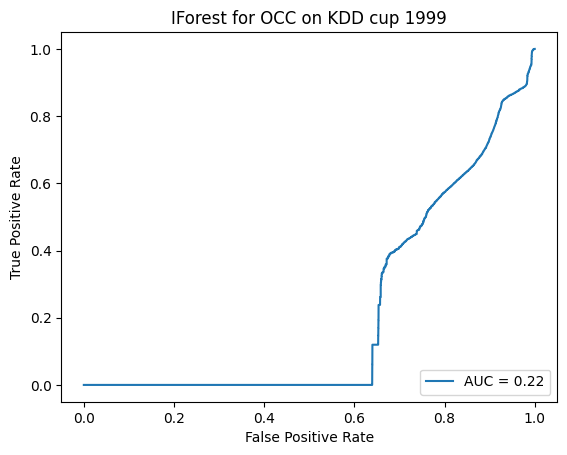

In [ ]:
import math
import matplotlib.pyplot as plt
from sklearn.metrics import RocCurveDisplay, roc_auc_score, roc_curve, auc

fpr, tpr, thresholds = roc_curve(y_test, y_pred2)
roc_auc = auc(fpr, tpr)
curve = RocCurveDisplay(fpr=fpr, tpr=tpr,roc_auc=roc_auc)
curve.plot()
plt.title("IForest for OCC on KDD cup 1999")
plt.show()

In [ ]:
from sklearn.metrics import roc_auc_score
auc1 = roc_auc_score(y_test, y_pred1)
auc2 = roc_auc_score(y_test, y_pred2)
print("AUC score (discrete prediction): ", auc1 * 100)
print("AUC score (continuous prediction):", auc2 * 100)

AUC score (discrete prediction):  41.7847420675973
AUC score (continuous prediction): 21.744339389511296


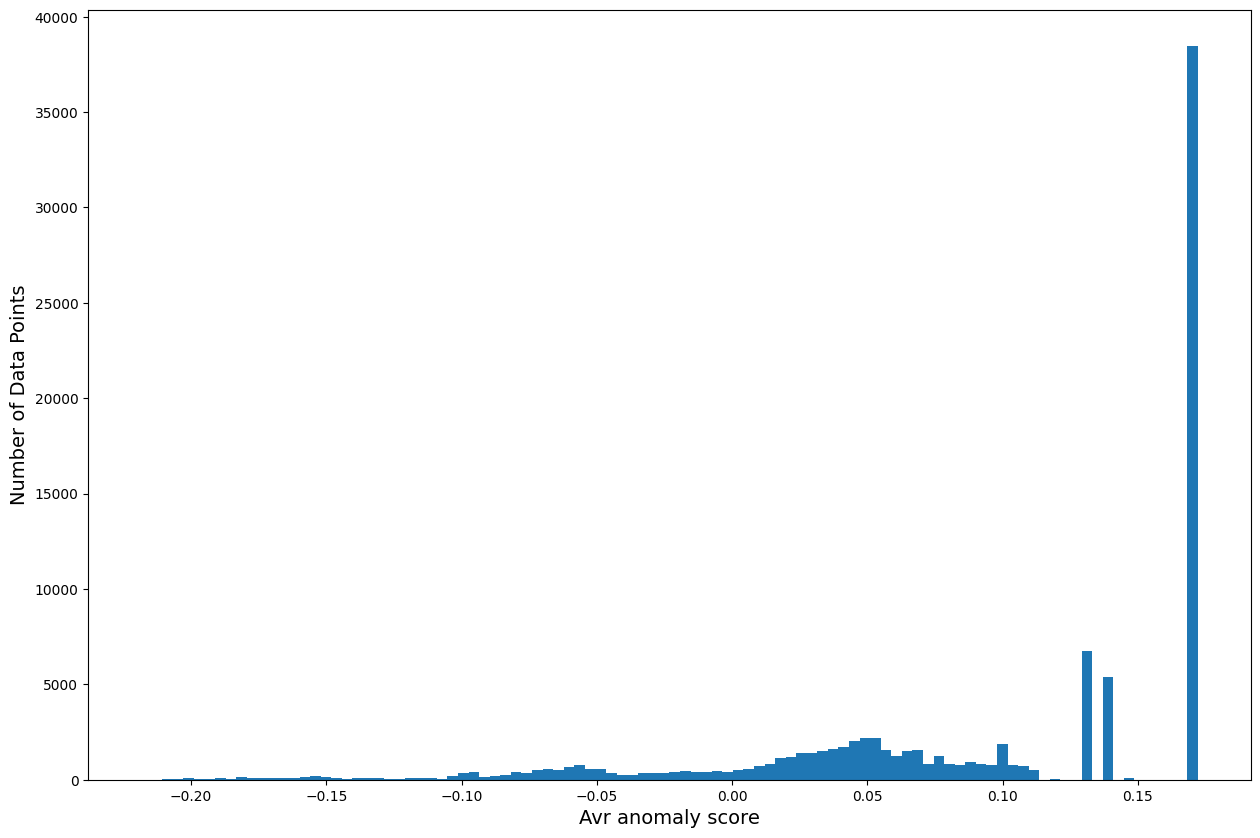

In [ ]:
plt.figure(figsize = (15, 10))

plt.hist(y_pred2, bins=100)

plt.xlabel('Avr anomaly score', fontsize=14)

plt.ylabel('Number of Data Points', fontsize=14)

plt.show()

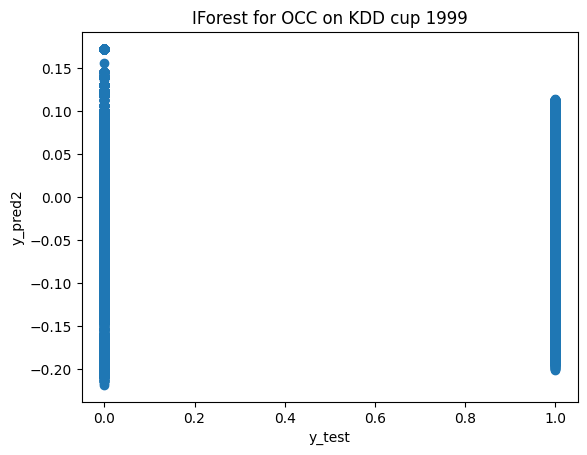

In [ ]:
plt.scatter(y_test, y_pred2)
plt.xlabel('y_test')
plt.ylabel('y_pred2')
plt.title("IForest for OCC on KDD cup 1999")
plt.show()


In [ ]:
from sklearn.model_selection import GridSearchCV

In [ ]:
# Initialize GridSearchCV
grid_search = GridSearchCV(iforest, (x_train, y_train), cv=5, scoring='accuracy')


In [ ]:
grid_search

GridSearchCV(cv=5, estimator=IsolationForest(bootstrap=True, random_state=42),
             param_grid=(array([[ 0., 14.,  9., ...,  0.,  0.,  0.],
       [ 1., 45.,  5., ...,  1.,  0.,  0.],
       [ 1., 45.,  5., ...,  1.,  0.,  0.],
       ...,
       [ 1., 22.,  9., ...,  0.,  0.,  0.],
       [ 0., 14.,  9., ...,  0.,  0.,  0.],
       [ 1., 45.,  5., ...,  1.,  0.,  0.]]),
                         array([0, 0, 0, ..., 1, 0, 0])),
             scoring='accuracy')

In [ ]:
print("x_train shape:", x_train.shape)
print("y_train shape:", y_train.shape)


x_train shape: (395216, 41)
y_train shape: (395216,)


In [ ]:
df.shape

(494020, 41)

In [ ]:
df.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 494020 entries, 366667 to 156434
Data columns (total 41 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   duration                     494020 non-null  int64  
 1   protocol_type                494020 non-null  object 
 2   service                      494020 non-null  object 
 3   flag                         494020 non-null  object 
 4   src_bytes                    494020 non-null  int64  
 5   dst_bytes                    494020 non-null  int64  
 6   land                         494020 non-null  int64  
 7   wrong_fragment               494020 non-null  int64  
 8   urgent                       494020 non-null  int64  
 9   hot                          494020 non-null  int64  
 10  num_failed_logins            494020 non-null  int64  
 11  logged_in                    494020 non-null  int64  
 12  num_compromised              494020 non-null  int64  

In [ ]:
#grid_search.fit(x_train, y_train)


In [ ]:
from sklearn import svm
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score


In [ ]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 42)

In [ ]:
clf = svm.SVC()

In [ ]:
clf.fit(x_train, y_train)

In [ ]:
y_pred = clf.predict(x_test)

In [ ]:
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

In [ ]:
from sklearn.linear_model import LogisticRegression

In [ ]:
logreg_model = LogisticRegression()

In [ ]:
logreg_model.fit(x_train, y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [ ]:
y_pred_log = logreg_model.predict(x_test)

In [ ]:
accuracy = accuracy_score(y_test, y_pred_log)
print("Accuracy:", accuracy)

Accuracy: 0.9843224970648962


In [ ]:
from sklearn.ensemble import RandomForestClassifier

In [ ]:
rf_classifier = RandomForestClassifier()

In [ ]:
rf_classifier.fit(x_train, y_train)

RandomForestClassifier()

In [ ]:
y_pred_rf = rf_classifier.predict(x_test)

In [ ]:
accuracy = accuracy_score(y_test, y_pred_rf)
print("Accuracy:", accuracy)

Accuracy: 0.9998481842840371


In [ ]:
from sklearn.tree import DecisionTreeClassifier

In [ ]:
dt_classifier = DecisionTreeClassifier()

In [ ]:
dt_classifier.fit(x_train, y_train)

DecisionTreeClassifier()

In [ ]:
y_pred_dt = dt_classifier.predict(x_test)

In [ ]:
accuracy = accuracy_score(y_test, y_pred_dt)
print("Accuracy:", accuracy)

Accuracy: 0.9996154001862273


In [ ]:
import xgboost as xgb

In [ ]:
xgb_model = xgb.XGBClassifier(objective='binary:logistic', max_depth=3, learning_rate=0.1, n_estimators=100)

In [ ]:
xgb_model.fit(x_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.1, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=3, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=100, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

In [ ]:
y_pred_xg = xgb_model.predict(x_test)

In [ ]:
accuracy = accuracy_score(y_test, y_pred_xg)
print("Accuracy:", accuracy)

Accuracy: 0.9992814056111089
